In [1]:
import numpy as np
import pandas as pd

## Data Preprocessing

### Load and clean data

In [2]:
# load data
df_1 = pd.read_csv('pdb_data_no_dups.csv')
df_2 = pd.read_csv('pdb_data_seq.csv')

In [3]:
df_1.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [4]:
df_2.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


In [5]:
def data_preprocess(df_info, df_seqs):
    '''
    Preprocess csv protein sequence and information data
    Input:
    df_info: pd dataframe from info csv
    df_seqs: pd dataframe from sequence csv
    Output:
    df_new: joint preprocessed pd dataframe
    '''
    
    # remove unwanted features
    df_1= df_info.drop(['experimentalTechnique', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'], axis=1) 
    df_2= df_seqs.drop(['chainId', 'residueCount'], axis=1) 
    
    # drop duplicated based on structureId
    df1 = df_1.drop_duplicates(subset='structureId', keep='first',inplace=False)
    df2 = df_2.drop_duplicates(subset='structureId', keep='first',inplace=False)
    
    # join two dataframes
    df = pd.merge(df1, df2, left_on='structureId', right_on='structureId')
    
    # select only protein sequences
    df_select= df[df['macromoleculeType_x']=='Protein']
    
    # remove feature indicating it is protein sequences
    df_select = df_select.drop(['macromoleculeType_x', 'macromoleculeType_y'], axis=1) 
    
    
    # remove duplicate sequences and NA values
    df_new = df_select.drop_duplicates(subset='sequence', keep='first',inplace=False)
    df_new = df_new.dropna(how='any')
    
    # rename structureId to Id
    df_new.columns = ['Id', 'classification',  'sequence']
    
    return df_new

In [6]:
def select_df(df, top_value = 10):
    '''
    Select classes with most number of sequences
    Input:
    df: pd dataframe with classification and sequences
    top_value: number of classes to be selected 
    Output:
    df_new: pd dataframe contains only the selected classes
    '''
    # count number of sequences in each classification
    count = df.groupby('classification')['Id'].nunique()
    sort_count = count.sort_values() # sort values
    classes = [i for i in sort_count.index if 'UNKNOWN' not in i] # remove unknown classes
    classes = classes[-top_value:] # pick top value classes
    print("Following classes are selected: ")
    print(classes)
    # selected rows in df belongs to the selected classes
    df_new = df[[c in classes for c in df.classification]]
    return df_new

In [7]:
df = data_preprocess(df_1, df_2)
top_value = 10
df_new = select_df(df,top_value)

Following classes are selected: 
['VIRAL PROTEIN', 'ISOMERASE', 'TRANSPORT PROTEIN', 'SIGNALING PROTEIN', 'TRANSCRIPTION', 'LYASE', 'IMMUNE SYSTEM', 'OXIDOREDUCTASE', 'TRANSFERASE', 'HYDROLASE']


In [8]:
df.head()

,Id,classification,sequence
2,101M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
4,102L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
5,102M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
7,103L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
10,104L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAA...


In [9]:
df_new.head()

,Id,classification,sequence
44,117E,HYDROLASE,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
50,11BA,HYDROLASE,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
52,11GS,TRANSFERASE,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...
170,177L,HYDROLASE,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
175,17GS,TRANSFERASE,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...


### Generate X Y data

X

In [10]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer

seqs = df_new.sequence.values
lengths = [len(s) for s in seqs]

# maximum length of sequence, discard everything else
max_length = 256

#create and fit tokenizer
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)

#represent input data as word rank number sequences
X = tokenizer.texts_to_sequences(seqs)
X = sequence.pad_sequences(X, maxlen=max_length)

Using TensorFlow backend.


Y

In [11]:
from sklearn.preprocessing import LabelBinarizer

# Transform labels to one-hot
lb = LabelBinarizer()
Y = lb.fit_transform(df_new.classification)

Check shape

In [12]:
X.shape

(38901, 256)

In [13]:
Y.shape

(38901, 10)

## LSTM

create top 3 accuracy metric

In [65]:
import functools
from keras.metrics import top_k_categorical_accuracy
top3_acc = functools.partial(top_k_categorical_accuracy, k=3)
top3_acc.__name__ = 'top3_acc'

Create and complie model

In [98]:
from keras.models import Sequential
from keras.layers import BatchNormalization, LSTM, Dense, Dropout
from keras import backend
if len(backend.tensorflow_backend._get_available_gpus()) > 0:
    from keras.layers import CuDNNLSTM as LSTM 

# Hyperparameters
dp = 0.6
embedding_dim = 20
l2_reg = 10e-3

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=512, kernel_size=3, padding='valid', activation='relu'))
model.add(Dropout(dp))
model.add(LSTM(256))
model.add(Dropout(dp))
model.add(Dense(128, activation='relu'))
model.add(Dropout(dp))
model.add(Dense(top_value, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy',top3_acc])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_28 (Embedding)     (None, 256, 20)           520       
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 254, 512)          31232     
_________________________________________________________________
dropout_59 (Dropout)         (None, 254, 512)          0         
_________________________________________________________________
cu_dnnlstm_12 (CuDNNLSTM)    (None, 256)               788480    
_________________________________________________________________
dropout_60 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_61 (Dropout)         (None, 128)               0         
__________

Split train and test sets

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

Train model

In [100]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=128)

Train on 31120 samples, validate on 7781 samples
Epoch 1/50
31120/31120 [==============================] - 13s 411us/step - loss: 2.0542 - acc: 0.2646 - top3_acc: 0.6408 - val_loss: 1.9905 - val_acc: 0.2880 - val_top3_acc: 0.6686
Epoch 2/50
31120/31120 [==============================] - 10s 309us/step - loss: 1.9749 - acc: 0.2878 - top3_acc: 0.6735 - val_loss: 1.8780 - val_acc: 0.3100 - val_top3_acc: 0.7011
Epoch 3/50
31120/31120 [==============================] - 10s 306us/step - loss: 1.9046 - acc: 0.3057 - top3_acc: 0.6925 - val_loss: 1.8112 - val_acc: 0.3231 - val_top3_acc: 0.7120
Epoch 4/50
31120/31120 [==============================] - 10s 309us/step - loss: 1.8325 - acc: 0.3253 - top3_acc: 0.7037 - val_loss: 1.7994 - val_acc: 0.3443 - val_top3_acc: 0.7009
Epoch 5/50
31120/31120 [==============================] - 10s 313us/step - loss: 1.8061 - acc: 0.3320 - top3_acc: 0.7092 - val_loss: 1.7376 - val_acc: 0.3512 - val_top3_acc: 0.7246
Epoch 6/50
31120/31120 [======================

Epoch 46/50
31120/31120 [==============================] - 10s 308us/step - loss: 0.7515 - acc: 0.7544 - top3_acc: 0.9074 - val_loss: 1.0903 - val_acc: 0.6706 - val_top3_acc: 0.8503
Epoch 47/50
31120/31120 [==============================] - 10s 314us/step - loss: 0.7403 - acc: 0.7587 - top3_acc: 0.9099 - val_loss: 1.1380 - val_acc: 0.6734 - val_top3_acc: 0.8519
Epoch 48/50
31120/31120 [==============================] - 10s 308us/step - loss: 0.7216 - acc: 0.7665 - top3_acc: 0.9130 - val_loss: 1.1184 - val_acc: 0.6688 - val_top3_acc: 0.8492
Epoch 49/50
31120/31120 [==============================] - 10s 311us/step - loss: 0.7075 - acc: 0.7695 - top3_acc: 0.9154 - val_loss: 1.1525 - val_acc: 0.6755 - val_top3_acc: 0.8528
Epoch 50/50
31120/31120 [==============================] - 10s 310us/step - loss: 0.7063 - acc: 0.7711 - top3_acc: 0.9165 - val_loss: 1.1069 - val_acc: 0.6752 - val_top3_acc: 0.8510


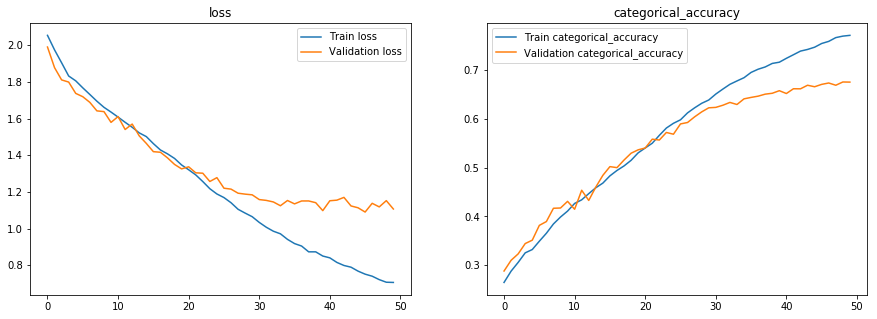

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(hist.epoch, hist.history["loss"], label="Train loss")
ax[0].plot(hist.epoch, hist.history["val_loss"], label="Validation loss")
ax[1].set_title('categorical_accuracy')
ax[1].plot(hist.epoch, hist.history["acc"], label="Train categorical_accuracy")
ax[1].plot(hist.epoch, hist.history["val_acc"], label="Validation categorical_accuracy")
ax[0].legend()
ax[1].legend()

 Display Results

Train accuracy = 0.8612789203084833
Test accuracy = 0.6752345456882148


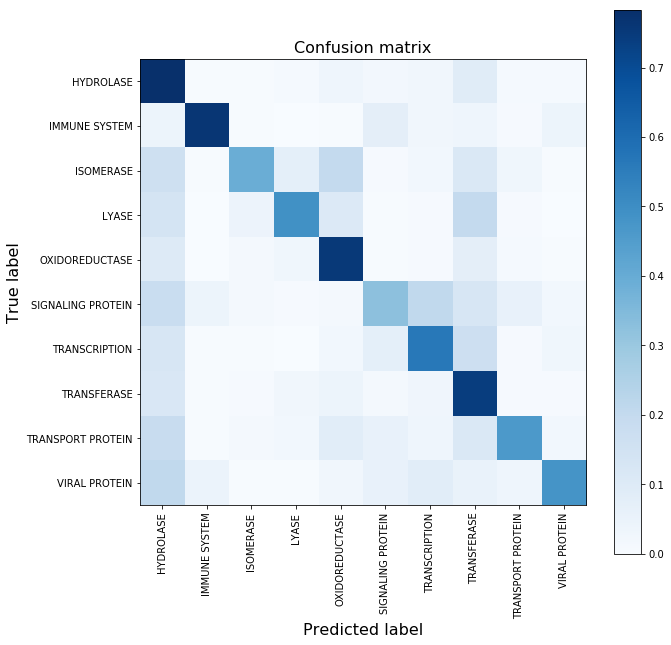

                   precision    recall  f1-score   support

        HYDROLASE       0.71      0.78      0.75      2210
    IMMUNE SYSTEM       0.88      0.76      0.82       495
        ISOMERASE       0.60      0.39      0.47       308
            LYASE       0.61      0.49      0.55       442
   OXIDOREDUCTASE       0.75      0.75      0.75      1243
SIGNALING PROTEIN       0.40      0.33      0.36       377
    TRANSCRIPTION       0.50      0.56      0.53       438
      TRANSFERASE       0.66      0.74      0.70      1603
TRANSPORT PROTEIN       0.63      0.46      0.53       372
    VIRAL PROTEIN       0.61      0.48      0.54       293

        micro avg       0.68      0.68      0.68      7781
        macro avg       0.63      0.58      0.60      7781
     weighted avg       0.67      0.68      0.67      7781



In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools
import matplotlib.pyplot as plt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Train accuracy = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("Test accuracy = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', fontsize = 16)
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
plt.ylabel('True label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

## CNN

In [93]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.layers.embeddings import Embedding
from keras import regularizers

# Hyperparameters
embedding_dim = 20
dp = 0.3

# create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, embedding_dim, input_length=max_length))
model.add(Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu'))
model.add(Dropout(dp))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, padding='valid', activation='relu'))
model.add(Dropout(dp))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(dp))
model.add(Dense(top_value, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy',top3_acc])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 256, 20)           520       
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 254, 128)          7808      
_________________________________________________________________
dropout_56 (Dropout)         (None, 254, 128)          0         
_________________________________________________________________
max_pooling1d_35 (MaxPooling (None, 127, 128)          0         
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 126, 64)           16448     
_________________________________________________________________
dropout_57 (Dropout)         (None, 126, 64)           0         
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 63, 64)            0         
__________

Split train and test sets

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

Train model

In [95]:
hist2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128)

Train on 31120 samples, validate on 7781 samples
Epoch 1/100
31120/31120 [==============================] - 6s 182us/step - loss: 1.8824 - acc: 0.3124 - top3_acc: 0.6891 - val_loss: 1.7303 - val_acc: 0.4041 - val_top3_acc: 0.7319
Epoch 2/100
31120/31120 [==============================] - 3s 81us/step - loss: 1.6705 - acc: 0.4053 - top3_acc: 0.7376 - val_loss: 1.6058 - val_acc: 0.4391 - val_top3_acc: 0.7535
Epoch 3/100
31120/31120 [==============================] - 3s 81us/step - loss: 1.5743 - acc: 0.4441 - top3_acc: 0.7575 - val_loss: 1.5406 - val_acc: 0.4729 - val_top3_acc: 0.7714
Epoch 4/100
31120/31120 [==============================] - 3s 85us/step - loss: 1.5023 - acc: 0.4757 - top3_acc: 0.7771 - val_loss: 1.5016 - val_acc: 0.4706 - val_top3_acc: 0.7780
Epoch 5/100
31120/31120 [==============================] - 3s 96us/step - loss: 1.4307 - acc: 0.5005 - top3_acc: 0.7944 - val_loss: 1.4229 - val_acc: 0.5227 - val_top3_acc: 0.7951
Epoch 6/100
31120/31120 [=========================

31120/31120 [==============================] - 3s 84us/step - loss: 0.7202 - acc: 0.7346 - top3_acc: 0.9351 - val_loss: 1.1184 - val_acc: 0.6563 - val_top3_acc: 0.8500
Epoch 47/100
31120/31120 [==============================] - 2s 77us/step - loss: 0.7162 - acc: 0.7357 - top3_acc: 0.9361 - val_loss: 1.1188 - val_acc: 0.6580 - val_top3_acc: 0.8451
Epoch 48/100
31120/31120 [==============================] - 3s 92us/step - loss: 0.7136 - acc: 0.7383 - top3_acc: 0.9350 - val_loss: 1.1392 - val_acc: 0.6498 - val_top3_acc: 0.8437
Epoch 49/100
31120/31120 [==============================] - 3s 88us/step - loss: 0.7069 - acc: 0.7401 - top3_acc: 0.9371 - val_loss: 1.1210 - val_acc: 0.6556 - val_top3_acc: 0.8512
Epoch 50/100
31120/31120 [==============================] - 2s 78us/step - loss: 0.7060 - acc: 0.7437 - top3_acc: 0.9397 - val_loss: 1.1247 - val_acc: 0.6621 - val_top3_acc: 0.8509
Epoch 51/100
31120/31120 [==============================] - 3s 82us/step - loss: 0.7035 - acc: 0.7442 - top3

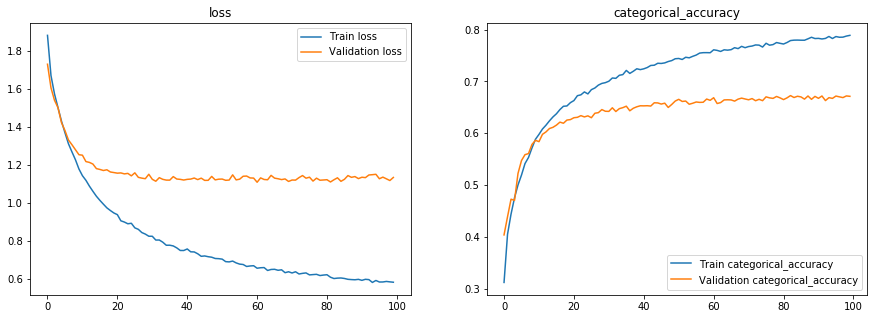

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(hist2.epoch, hist2.history["loss"], label="Train loss")
ax[0].plot(hist2.epoch, hist2.history["val_loss"], label="Validation loss")
ax[1].set_title('categorical_accuracy')
ax[1].plot(hist2.epoch, hist2.history["acc"], label="Train categorical_accuracy")
ax[1].plot(hist2.epoch, hist2.history["val_acc"], label="Validation categorical_accuracy")
ax[0].legend()
ax[1].legend()

 Display Results

train-acc = 0.9626606683804627
test-acc = 0.6712504819431949


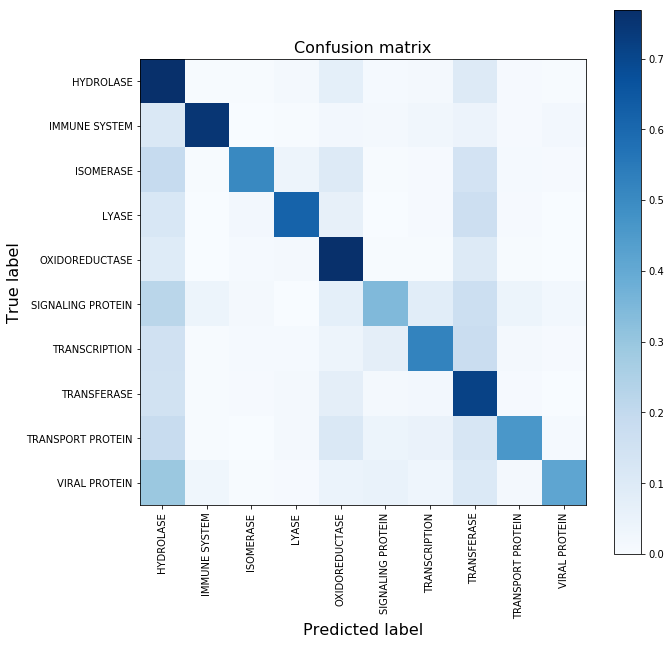

                   precision    recall  f1-score   support

        HYDROLASE       0.66      0.77      0.71      2114
    IMMUNE SYSTEM       0.90      0.75      0.82       536
        ISOMERASE       0.74      0.50      0.60       317
            LYASE       0.74      0.62      0.67       479
   OXIDOREDUCTASE       0.68      0.77      0.72      1208
SIGNALING PROTEIN       0.50      0.34      0.41       377
    TRANSCRIPTION       0.61      0.52      0.56       441
      TRANSFERASE       0.62      0.71      0.67      1632
TRANSPORT PROTEIN       0.71      0.46      0.56       367
    VIRAL PROTEIN       0.78      0.41      0.54       310

        micro avg       0.67      0.67      0.67      7781
        macro avg       0.69      0.59      0.63      7781
     weighted avg       0.68      0.67      0.67      7781



In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools
import matplotlib.pyplot as plt

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

# Compute confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix',fontsize = 16)
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
plt.ylabel('True label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))